In [1]:
# Description: This programe is inspired by Youtube Channel Computer Science https://www.youtube.com/watch?v=iGWbqhdjf2s with some imprpvements
#              A convolutional neural networks (CNN)-based deep learning algorithm which incoporates TensorFlow and Keras to classify images
#              Trained with the CIFAR-100 dataset.

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Load Data
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [4]:
# Check data types of variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# Get shape of arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [6]:
# Look at the first image as an array
index = 0
x_train[index] 

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

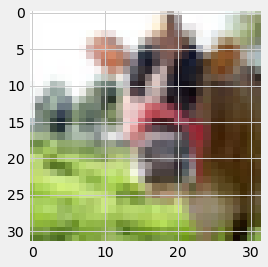

In [7]:
# Show image as img
img = plt.imshow(x_train[index])

In [8]:
# Get image label
print('The image label is: ', y_train[index])

The image label is:  [19]


In [9]:
# Image classification defined by CIFAR
classification = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# Print Image Class
print('The image class is : ', classification[y_train[index][0]])

The image class is :  cattle


In [10]:
# Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [11]:
# Print the new labels
print(y_train_one_hot)
print(y_test_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
# Print the new label of the image/ picture above
print('The one hot label is: ', y_train_one_hot[index])

The one hot label is:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [13]:
# Normalize pixels to values between 0 and 1
x_train = x_train/255
x_test = x_test/255

In [14]:
# Create the models architecture
model = Sequential()

# Add the first layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape = (32,32,3)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# Add another convolution layer
model.add(MaxPooling2D(pool_size = (2,2)))

# Add a flattening layer
model.add(Flatten())

# Add a layer with 1000 neurons
model.add(Dense(1000, activation = 'relu'))

# Add a dropout layer
model.add(Dropout(0.5))

# Add a layer with 500 neurons
model.add(Dense(500, activation = 'relu'))

# Add a dropout layer
model.add(Dropout(0.5))

# Add a layer with 100 neurons
model.add(Dense(100, activation = 'softmax'))

In [15]:
# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
# Train the model
hist = model.fit(x_train, y_train_one_hot, batch_size=250, epochs=20, validation_split=0.2)

Epoch 1/20
160/160 [==============================] - 39s 240ms/step - loss: 4.4556 - accuracy: 0.0289 - val_loss: 3.6956 - val_accuracy: 0.1404
Epoch 2/20
160/160 [==============================] - 38s 236ms/step - loss: 3.6988 - accuracy: 0.1278 - val_loss: 3.2703 - val_accuracy: 0.2179
Epoch 3/20
160/160 [==============================] - 38s 239ms/step - loss: 3.3523 - accuracy: 0.1940 - val_loss: 3.0659 - val_accuracy: 0.2551
Epoch 4/20
160/160 [==============================] - 38s 241ms/step - loss: 3.1293 - accuracy: 0.2286 - val_loss: 2.8953 - val_accuracy: 0.2882
Epoch 5/20
160/160 [==============================] - 39s 241ms/step - loss: 2.9577 - accuracy: 0.2598 - val_loss: 2.7754 - val_accuracy: 0.3168
Epoch 6/20
160/160 [==============================] - 38s 237ms/step - loss: 2.8137 - accuracy: 0.2921 - val_loss: 2.7375 - val_accuracy: 0.3160
Epoch 7/20
160/160 [==============================] - 38s 239ms/step - loss: 2.7007 - accuracy: 0.3135 - val_loss: 2.6137 - val_ac

In [17]:
# Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 4s 13ms/step - loss: 2.3298 - accuracy: 0.4028


0.4027999937534332

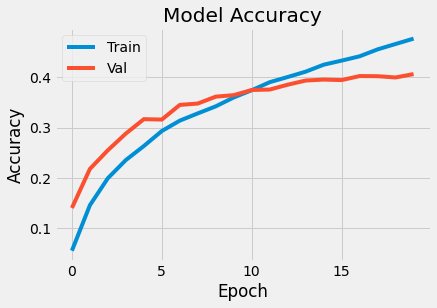

In [18]:
# Visualize the model's accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

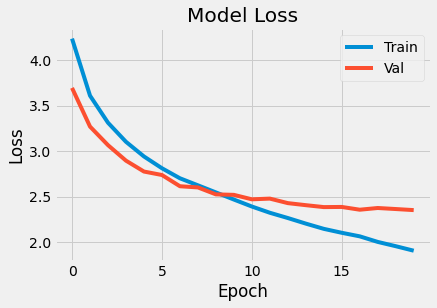

In [19]:
# Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [20]:
# Resize the image
new_image = plt.imread("sample_data/lion.jpg")
from skimage.transform import resize
resized_image = resize(new_image, (32, 32, 3))

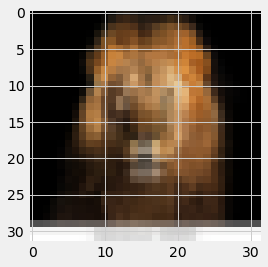

In [21]:
# Show the images
img = plt.imshow(new_image)
img = plt.imshow(resized_image)

In [22]:
# Get the model's prediction
predictions = model.predict(np.array([resized_image]))
# Show prediction
print(predictions)

[[1.01801263e-04 4.57997579e-04 2.19071796e-03 7.98939436e-04
  5.55838269e-05 3.69392546e-06 5.81489985e-05 1.82393978e-05
  2.55195209e-06 1.01911800e-03 1.39932835e-03 1.84290635e-03
  4.27250484e-08 5.09125471e-07 5.80904707e-05 6.48557325e-04
  3.33715021e-03 1.03631599e-07 1.37252850e-04 9.64867722e-05
  7.47711795e-07 4.98009558e-06 3.11436690e-03 2.97749523e-07
  6.72076703e-06 8.32064325e-06 1.28626634e-04 7.88302373e-07
  1.12273861e-02 7.25368154e-05 2.95955829e-07 1.19437072e-06
  5.10460013e-05 3.01559139e-05 2.78321858e-02 2.00717873e-03
  6.56333342e-02 6.18035529e-07 5.70836091e-05 1.48445270e-05
  2.32262863e-03 1.10029328e-06 4.19310946e-03 7.84710348e-01
  4.63055439e-05 3.97915574e-04 2.30343523e-03 3.67450448e-05
  3.59423638e-08 1.06240359e-08 1.54519652e-03 1.25885685e-03
  9.60067137e-09 2.43385485e-03 3.93998780e-05 3.59426922e-05
  1.54182180e-06 4.93247760e-03 6.95077773e-10 1.31588683e-06
  3.21884142e-09 3.61864950e-04 4.09910426e-05 2.10422240e-05
  1.0557

In [23]:
# Sort the predictions in accending order
list_index = np.arange(100).tolist()
x = predictions

for i in range(100):
  for j in range(100):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[43, 36, 88, 34, 28, 98, 80, 94, 57, 42, 16, 22, 53, 40, 46, 2, 35, 11, 50, 10, 51, 92, 65, 9, 3, 15, 70, 1, 86, 78, 77, 45, 61, 99, 96, 83, 18, 26, 72, 64, 0, 19, 97, 79, 29, 84, 6, 14, 38, 4, 32, 44, 62, 54, 47, 67, 55, 82, 93, 33, 63, 7, 39, 87, 66, 25, 24, 76, 21, 5, 8, 56, 74, 59, 69, 89, 31, 41, 27, 20, 91, 37, 81, 13, 90, 23, 30, 73, 17, 71, 12, 48, 75, 95, 49, 52, 85, 60, 68, 58]


In [24]:
# Print the first 5 predictions
print('Classification :')
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

Classification :
lion : 78.47 %
hamster : 6.56 %
tiger : 5.23 %
fox : 2.78 %
cup : 1.12 %
